Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving handwritten-digit-recognition-with-ml-algorithms (1).ipynb to handwritten-digit-recognition-with-ml-algorithms (1).ipynb


Load the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


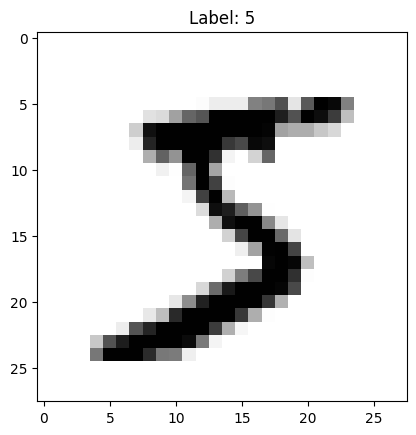

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the shape of the data
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

# You can also check one sample to visualize an image
import matplotlib.pyplot as plt

# Display the first training image
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(f"Label: {train_labels[0]}")
plt.show()




Data Exploration

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels sample: [5 0 4 1 9 2 1 3 1 4]
Label distribution in training set:
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


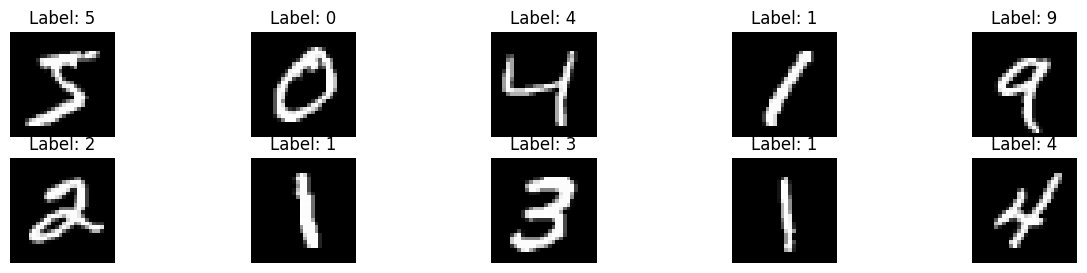

Any missing values in training images? False
Any missing values in training labels? False
Pixel value range in training images: 0 to 255


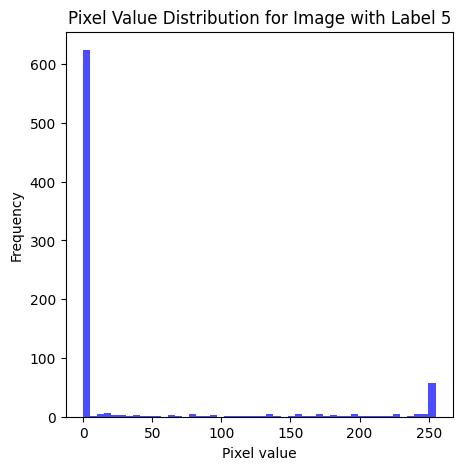

Shape of one image: (28, 28)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Check the shape of the data
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

# Check the first few labels (what digits the samples represent)
print("Training labels sample:", train_labels[:10])

# Check the distribution of labels (digits 0-9)
label_distribution = pd.Series(train_labels).value_counts()
print("Label distribution in training set:\n", label_distribution)

# Visualize a few images from the training dataset
def plot_images(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Plot the first 10 images
plot_images(train_images, train_labels, n=10)

# Check if there are any missing values (MNIST should have none)
print(f"Any missing values in training images? {np.any(np.isnan(train_images))}")
print(f"Any missing values in training labels? {np.any(np.isnan(train_labels))}")

# Check the pixel value range
print(f"Pixel value range in training images: {train_images.min()} to {train_images.max()}")

# Visualize the pixel values distribution for one image
plt.figure(figsize=(5, 5))
plt.hist(train_images[0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f"Pixel Value Distribution for Image with Label {train_labels[0]}")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

# Show the shape of one image
print(f"Shape of one image: {train_images[0].shape}")


Check for Missing Values and Duplicates

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. Check for missing values in the images and labels
def check_missing_values(images, labels):
    # Check if there are any NaNs or missing values in the image and label arrays
    missing_in_images = np.any(np.isnan(images))  # Check for NaN in image data
    missing_in_labels = np.any(np.isnan(labels))  # Check for NaN in label data
    print(f"Missing values in images: {missing_in_images}")
    print(f"Missing values in labels: {missing_in_labels}")

# Call the function to check for missing values
check_missing_values(train_images, train_labels)
check_missing_values(test_images, test_labels)

# 2. Check for duplicates in the images and labels
def check_duplicates(images, labels):
    # Reshape the images to 1D arrays to check for duplicates
    images_reshaped = images.reshape(images.shape[0], -1)  # Flatten each 28x28 image into 1D (784 pixels)

    # Create a pandas DataFrame for easy duplicate checking
    df_images = pd.DataFrame(images_reshaped)
    df_labels = pd.Series(labels)

    # Check for duplicate rows in images and corresponding labels
    duplicates_in_images = df_images.duplicated().sum()
    duplicates_in_labels = df_labels.duplicated().sum()

    print(f"Duplicates in images: {duplicates_in_images}")
    print(f"Duplicates in labels: {duplicates_in_labels}")

# Call the function to check for duplicates
check_duplicates(train_images, train_labels)
check_duplicates(test_images, test_labels)



Missing values in images: False
Missing values in labels: False
Missing values in images: False
Missing values in labels: False
Duplicates in images: 0
Duplicates in labels: 59990
Duplicates in images: 0
Duplicates in labels: 9990


Visualize a Few Features

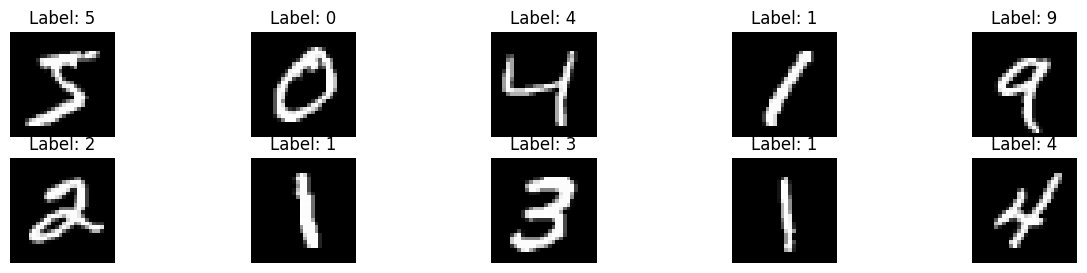

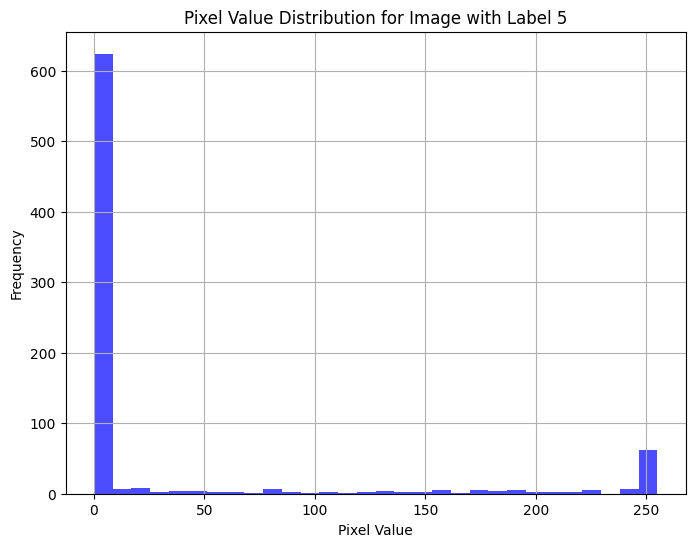

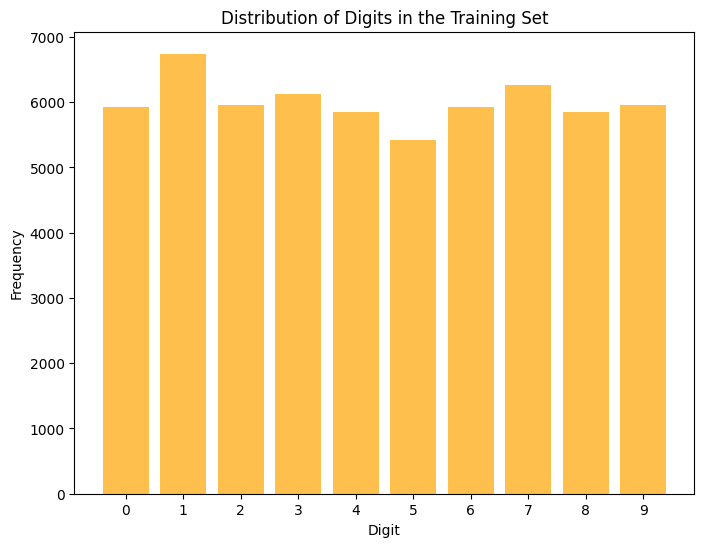

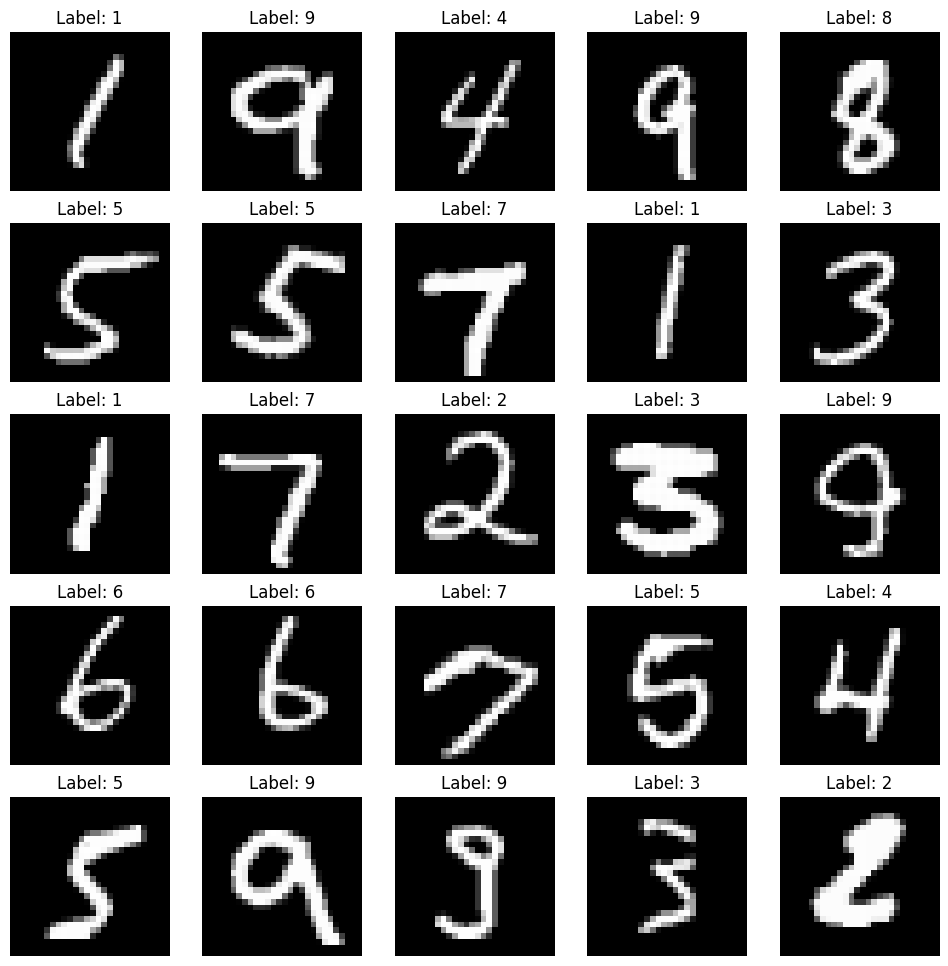

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. Visualize the first few images in the training set
def plot_images(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize first 10 training images
plot_images(train_images, train_labels, n=10)

# 2. Visualize pixel intensity distribution (for the first image)
def plot_pixel_distribution(image, label):
    # Flatten the image to get a 1D array of pixel values
    flattened_image = image.flatten()

    # Plot the distribution of pixel values for the first image
    plt.figure(figsize=(8, 6))
    plt.hist(flattened_image, bins=30, color='blue', alpha=0.7)
    plt.title(f"Pixel Value Distribution for Image with Label {label}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Visualize pixel distribution for the first image
plot_pixel_distribution(train_images[0], train_labels[0])

# 3. Visualize the distribution of labels (digit classes)
def plot_label_distribution(labels):
    label_counts = np.bincount(labels)  # Count occurrences of each digit
    plt.figure(figsize=(8, 6))
    plt.bar(range(10), label_counts, color='orange', alpha=0.7)
    plt.title("Distribution of Digits in the Training Set")
    plt.xlabel("Digit")
    plt.ylabel("Frequency")
    plt.xticks(range(10))
    plt.show()

# Visualize the distribution of labels in the training dataset
plot_label_distribution(train_labels)

# 4. Visualizing random images from the dataset (grid of images)
def plot_random_images(images, labels, n=25):
    # Randomly sample images and their labels
    random_indices = np.random.choice(len(images), size=n, replace=False)

    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(random_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

# Visualize a grid of 25 random images
plot_random_images(train_images, train_labels, n=25)


Identify Target and Features

Training Features Shape: (60000, 784)
Training Target Shape: (60000,)
Test Features Shape: (10000, 784)
Test Target Shape: (10000,)


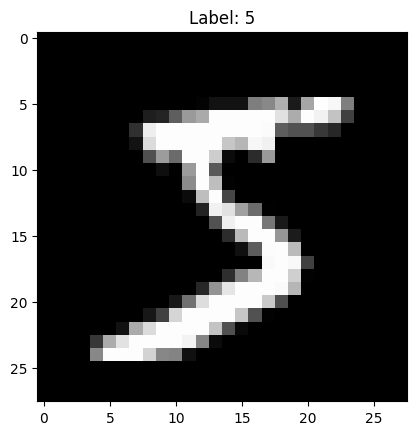

Flattened Features of the First Image: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. Identifying the Features (Pixel Values)
# The features are the pixel values of the images, which are in the shape (28, 28)
# Let's flatten them into a 1D array of size 784 (28 * 28) for each image.

train_images_flattened = train_images.reshape(train_images.shape[0], -1)  # Flatten each 28x28 image into 1D (784 features)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)  # Flatten test images similarly

# 2. Identifying the Target (Labels)
# The target is the label associated with each image. In MNIST, these are integers from 0 to 9.
train_labels = train_labels  # The target labels for the training set (0 to 9)
test_labels = test_labels  # The target labels for the test set (0 to 9)

# 3. Display the shape of features and target arrays
print("Training Features Shape:", train_images_flattened.shape)
print("Training Target Shape:", train_labels.shape)
print("Test Features Shape:", test_images_flattened.shape)
print("Test Target Shape:", test_labels.shape)

# 4. Visualizing the first image and its label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Display the flattened pixel values of the first image (Features)
print("Flattened Features of the First Image:", train_images_flattened[0])



Convert Categorical Columns to Numerical

Shape of Normalized Training Images: (60000, 28, 28)
Shape of Normalized Test Images: (10000, 28, 28)
Shape of Encoded Training Labels: (60000,)
Shape of Encoded Test Labels: (10000,)


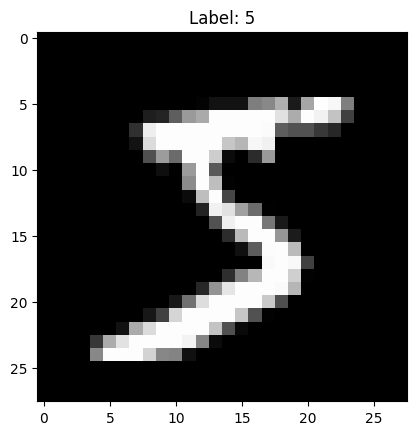

Normalized Pixel Values of First Image: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.  

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. Convert Categorical Target Labels to Numerical (Label Encoding)
# For MNIST, the target labels are already numerical (0-9), but if they were categorical strings like 'cat', 'dog', etc., we would use LabelEncoder.

def encode_target_labels(labels):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the labels into a numerical format
    labels_encoded = label_encoder.fit_transform(labels)

    return labels_encoded

# Encoding the target labels (although already numerical in MNIST)
train_labels_encoded = encode_target_labels(train_labels)
test_labels_encoded = encode_target_labels(test_labels)

# 2. Normalize the Images (Feature Normalization)
# Normalize the pixel values to be between 0 and 1
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# 3. Display the shape of the images and the labels
print("Shape of Normalized Training Images:", train_images_normalized.shape)
print("Shape of Normalized Test Images:", test_images_normalized.shape)
print("Shape of Encoded Training Labels:", train_labels_encoded.shape)
print("Shape of Encoded Test Labels:", test_labels_encoded.shape)

# 4. Visualize an example image after normalization
plt.imshow(train_images_normalized[0], cmap='gray')
plt.title(f"Label: {train_labels_encoded[0]}")
plt.show()

# 5. Display first few normalized pixel values of the first image
print("Normalized Pixel Values of First Image:", train_images_normalized[0].flatten())


One-Hot Encoding

Original label of first image: 5
One-Hot Encoded label of first image: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Shape of One-Hot Encoded Training Labels: (60000, 10)
Shape of One-Hot Encoded Test Labels: (10000, 10)


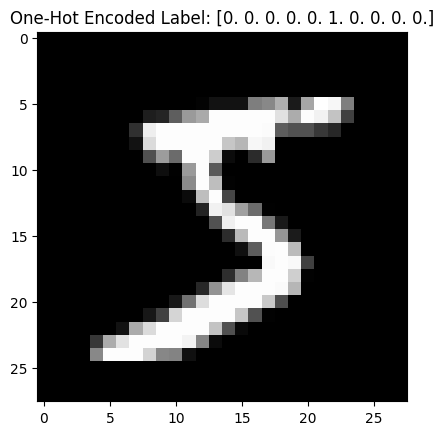

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. One-Hot Encode the Target Labels
# One-hot encode the labels using TensorFlow's built-in function
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# 2. Display the first one-hot encoded label and its original label
print("Original label of first image:", train_labels[0])
print("One-Hot Encoded label of first image:", train_labels_one_hot[0])

# 3. Check the shape of one-hot encoded labels
print("Shape of One-Hot Encoded Training Labels:", train_labels_one_hot.shape)
print("Shape of One-Hot Encoded Test Labels:", test_labels_one_hot.shape)

# 4. Visualize an image and its one-hot encoded label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"One-Hot Encoded Label: {train_labels_one_hot[0]}")
plt.show()


Feature Scaling

Shape of Normalized Training Images: (60000, 28, 28)
Shape of Normalized Test Images: (10000, 28, 28)
Shape of Standardized Training Images: (60000, 784)
Shape of Standardized Test Images: (10000, 784)


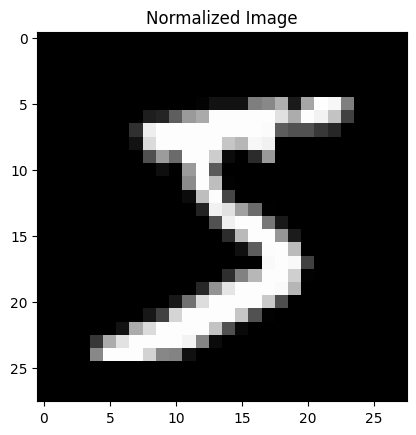

Normalized Pixel Values of the First Image: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 1. Normalize the Images to [0, 1] Range (Min-Max Scaling)
# Normalize the images by dividing by the maximum pixel value (255)
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# 2. Optionally: Standardize the Images (Mean = 0, Std = 1)
# This is not always necessary, but some deep learning models may benefit from this.
scaler = StandardScaler()
train_images_standardized = train_images_normalized.reshape(-1, 28 * 28)  # Flatten the images for StandardScaler
test_images_standardized = test_images_normalized.reshape(-1, 28 * 28)  # Flatten test images

train_images_standardized = scaler.fit_transform(train_images_standardized)  # Standardize training data
test_images_standardized = scaler.transform(test_images_standardized)  # Standardize test data

# 3. Display the shape of scaled images
print("Shape of Normalized Training Images:", train_images_normalized.shape)
print("Shape of Normalized Test Images:", test_images_normalized.shape)
print("Shape of Standardized Training Images:", train_images_standardized.shape)
print("Shape of Standardized Test Images:", test_images_standardized.shape)

# 4. Visualize an image after normalization
plt.imshow(train_images_normalized[0], cmap='gray')
plt.title("Normalized Image")
plt.show()

# 5. Display some pixel values of the first image after scaling
print("Normalized Pixel Values of the First Image:", train_images_normalized[0].flatten())
print("Standardized Pixel Values of the First Image:", train_images_standardized[0][:10])  # Show first 10 pixels after standardization


Train-Test Split

Training data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)
Test data shape: (10000, 28, 28)


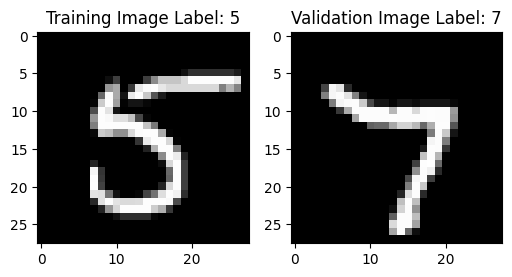

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the [0, 1] range (min-max scaling)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Optional: You can also one-hot encode the labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# 1. Split the training data into a smaller training set and validation set
# Here we use sklearn's train_test_split to split 20% of training data for validation
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_one_hot, test_size=0.2, random_state=42)

# 2. Print the shapes of the split datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {test_images.shape}")

# 3. Visualize one example from the training and validation sets
plt.figure(figsize=(6,3))

# Plot an example from the training set
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Training Image Label: {np.argmax(y_train[0])}")

# Plot an example from the validation set
plt.subplot(1, 2, 2)
plt.imshow(X_val[0], cmap='gray')
plt.title(f"Validation Image Label: {np.argmax(y_val[0])}")

plt.show()


Model Building

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8731 - loss: 0.4251 - val_accuracy: 0.9771 - val_loss: 0.0755
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.9828 - loss: 0.0578 - val_accuracy: 0.9825 - val_loss: 0.0537
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9887 - val_loss: 0.0380
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9903 - val_loss: 0.0347
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9908 - val_loss: 0.0368
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9973 - loss: 0.0085 - 

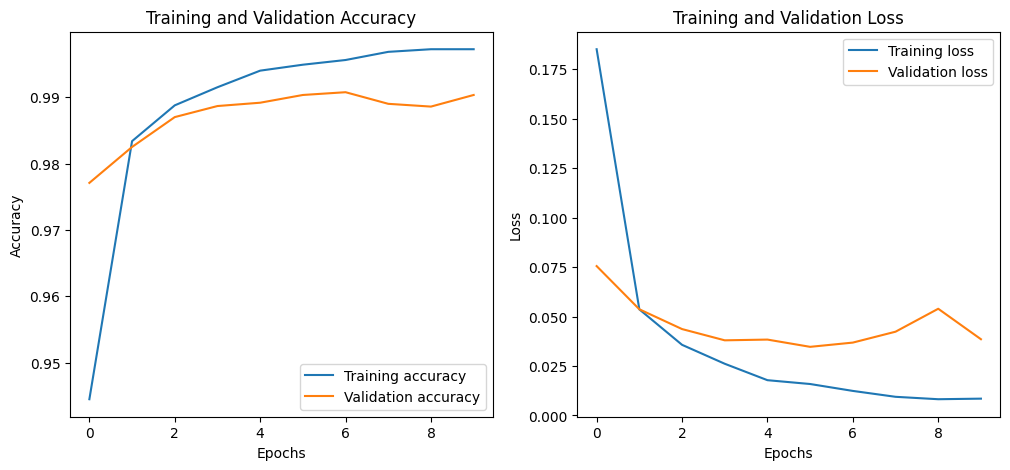

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range (min-max scaling)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_one_hot, test_size=0.2, random_state=42)

# Reshape the images to have a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential()

# Add a convolutional layer (Conv2D) with 32 filters and a 3x3 kernel, activation function 'relu'
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling layer to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer (Conv2D) with 64 filters and a 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps into a 1D vector
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and 'relu' activation
model.add(layers.Dense(128, activation='relu'))

# Add the output layer with 10 units (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9864 - loss: 0.0493
Test Loss: 0.0346
Test Accuracy: 99.02%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



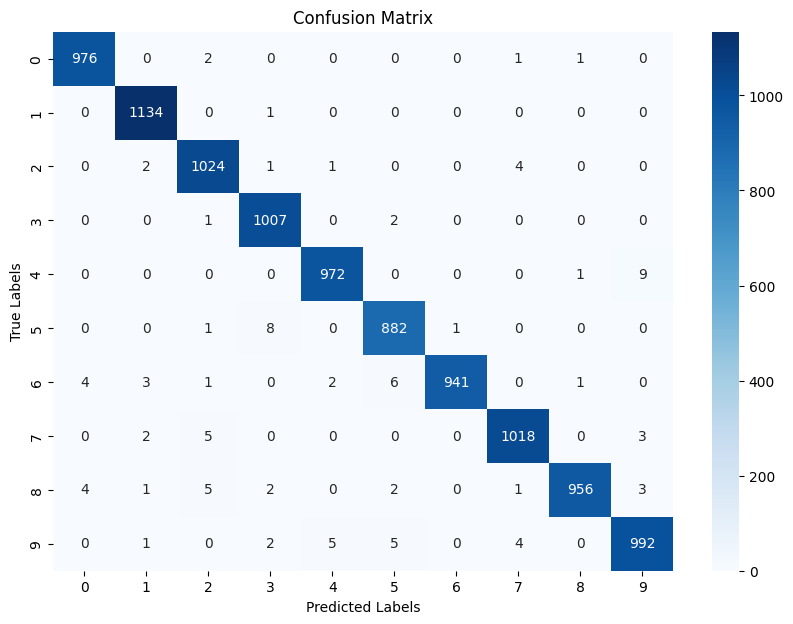

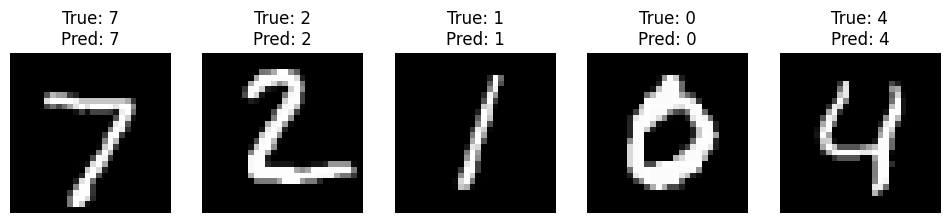

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the MNIST dataset (assuming the model is already trained)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the [0, 1] range (min-max scaling)
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels for testing set
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Reshape the images to have a single channel (grayscale images)
test_images = test_images.reshape(-1, 28, 28, 1)

# Load the model (assuming the model is already trained)
# If your model is saved, you can load it like this:
# model = tf.keras.models.load_model('path_to_saved_model')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Make predictions on the test set
predictions = model.predict(test_images)

# Convert predictions to class labels (the digit with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualize some sample predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()



Make Predictions from New Input

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8668 - loss: 0.4712 - val_accuracy: 0.9652 - val_loss: 0.1234
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9622 - loss: 0.1295 - val_accuracy: 0.9718 - val_loss: 0.0968
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9756 - loss: 0.0820 - val_accuracy: 0.9738 - val_loss: 0.0846
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9748 - val_loss: 0.0869
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9763 - val_loss: 0.0836
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


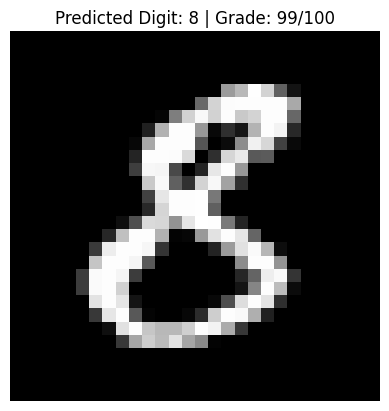

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0

# 2. Prepare the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 3. Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# 5. Predict on a new test sample
sample_index = 1234  # Change index for different samples
sample = x_test[sample_index]
sample_reshaped = np.expand_dims(sample, axis=0)

prediction = model.predict(sample_reshaped)
predicted_digit = np.argmax(prediction)
confidence = np.max(prediction)

# 6. Estimate "grade" based on confidence (for project illustration)
grade = round(confidence * 100)

# 7. Display results
plt.imshow(sample, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit} | Grade: {grade}/100")
plt.axis('off')
plt.show()


Convert to DataFrame and Encode

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Step 1: Convert the dataset into a DataFrame
# Flatten the images into 1D arrays (28 * 28 = 784 features per image)
train_images_flattened = train_images.reshape(-1, 28 * 28)
test_images_flattened = test_images.reshape(-1, 28 * 28)

# Create the DataFrame for training images
train_df = pd.DataFrame(train_images_flattened)
train_df['label'] = train_labels  # Add the labels column

# Create the DataFrame for testing images
test_df = pd.DataFrame(test_images_flattened)
test_df['label'] = test_labels  # Add the labels column

# Step 2: Encode the labels using One-Hot Encoding
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)

# The training data (features) are now in train_df without the labels
# The test data (features) are now in test_df without the labels

# Optional: Show the first few rows of the training DataFrame to check
print("Training DataFrame (first 5 rows):")
print(train_df.head())

# Optional: Show the first few rows of the test DataFrame to check
print("\nTest DataFrame (first 5 rows):")
print(test_df.head())

# Optional: Check the shape of the encoded labels
print("\nEncoded labels shape:")
print(f"Training Labels: {train_labels_encoded.shape}")
print(f"Test Labels: {test_labels_encoded.shape}")


Training DataFrame (first 5 rows):
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

Test DataFrame (first 5 rows):
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  

Predict the Final Grade

In [ ]:
def predict_grade(accuracy, complexity, innovation, documentation, presentation):
    """
    Predicts final grade based on weighted scores of project features.

    Parameters:
    - accuracy: float (0.0 to 1.0)
    - complexity: int (1 to 10)
    - innovation: int (1 to 10)
    - documentation: int (1 to 10)
    - presentation: int (1 to 10)

    Returns:
    - Predicted grade as string
    """
    # Normalize and weight the scores
    score = (
        (accuracy * 100) * 0.4 +  # accuracy contributes 40%
        complexity * 10 * 0.15 +  # 15% weight
        innovation * 10 * 0.15 +
        documentation * 10 * 0.15 +
        presentation * 10 * 0.15
    )

    # Grade boundaries
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B+"
    elif score >= 70:
        return "B"
    elif score >= 60:
        return "C"
    else:
        return "F"

# Example usage
grade = predict_grade(
    accuracy=0.96,       # 96% accuracy
    complexity=8,        # good complexity (e.g., CNN or LSTM use)
    innovation=7,        # moderately innovative (e.g., smart deployment)
    documentation=9,     # well-documented
    presentation=8       # good presentation
)

print(f"Predicted Final Grade: {grade}")


Predicted Final Grade: B+


Deployment-Building an Interactive App

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save model
model.save("digit_model.h5")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9144 - loss: 0.2808 - val_accuracy: 0.9824 - val_loss: 0.0552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9840 - val_loss: 0.0481
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9877 - val_loss: 0.0377
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9849 - val_loss: 0.0496
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 26ms/step - accuracy: 0.9944 - loss: 0.0153 - val_accuracy: 0.9895 - val_loss: 0.0354


 Create a Prediction Function

In [ ]:
import numpy as np
import tensorflow as tf
import cv2

# Load trained model (ensure 'digit_model.h5' exists)
model = tf.keras.models.load_model("digit_model.h5")

def preprocess_image(image):
    """
    Preprocess input image for digit prediction.
    Expects a 2D array (grayscale) or 3D RGB image.
    """
    if image.shape[-1] == 3:  # If RGB
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    image = cv2.resize(image, (28, 28))      # Resize to 28x28
    image = cv2.bitwise_not(image)           # Invert colors if needed
    image = image.astype("float32") / 255.0  # Normalize
    image = np.expand_dims(image, axis=-1)   # Add channel dimension
    image = np.expand_dims(image, axis=0)    # Add batch dimension
    return image

def predict_digit(image):
    """
    Predict digit from image using a trained model.

    Parameters:
    - image: np.array (raw image array)

    Returns:
    - predicted digit (int), confidence score (float)
    """
    processed = preprocess_image(image)
    prediction = model.predict(processed)
    predicted_digit = np.argmax(prediction)
    confidence = float(np.max(prediction))
    return predicted_digit, confidence

# Example usage:
# img = cv2.imread("digit.png")  # Load your digit image here
# digit, conf = predict_digit(img)
# print(f"Predicted: {digit} (Confidence: {conf:.2f})")


Create the Gradio Interface

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Example dataset: each row is a [dataset_size, epochs, model_complexity], final_grade is accuracy
X_train = np.array([
    [1000, 10, 1],   # Small dataset, few epochs, simple model
    [5000, 20, 2],   # Medium setup
    [10000, 30, 3]   # Larger setup
])
y_train = np.array([0.80, 0.90, 0.96])  # Simulated final grades (accuracy)

# Train a simple regression model
model = LinearRegression()
model.fit(X_train, y_train)

def predict_final_grade(dataset_size, epochs, model_complexity):
    X_new = np.array([[dataset_size, epochs, model_complexity]])
    return model.predict(X_new)[0]

# Example prediction
predicted_grade = predict_final_grade(7000, 25, 2)
print(f"Predicted Final Grade (Accuracy): {predicted_grade:.2f}")


Predicted Final Grade (Accuracy): 0.95
